In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
ch = pd.read_csv('D:/python/005.ML/Churn.csv')
ch.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
ch.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### EDA

In [4]:
ch.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
ch.count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [6]:
df = ch

In [7]:
df = df.drop(columns= ['RowNumber','CustomerId','Surname'])

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df.iloc[:,1] = le.fit_transform(df.iloc[:,1])
df.iloc[:,2] = le.fit_transform(df.iloc[:,2])

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### Determinig the adequate features

In [9]:
corr = df.corr()

<Axes: >

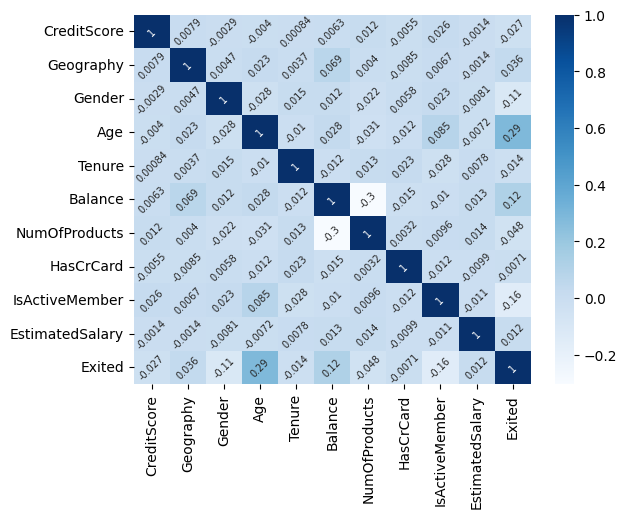

In [10]:
sns.heatmap(corr, cmap='Blues',annot=True,annot_kws={'size': 7, 'rotation': 45})

### Choosing the suitable features as X-array

In [11]:
x = df.iloc[:,[0,1,3,4,5,6,7,9]]
x = np.array(x)
x

array([[619, 0, 42, ..., 1, 1, 101348.88],
       [608, 2, 41, ..., 1, 0, 112542.58],
       [502, 0, 42, ..., 3, 1, 113931.57],
       ...,
       [709, 0, 36, ..., 1, 0, 42085.58],
       [772, 1, 42, ..., 2, 1, 92888.52],
       [792, 0, 28, ..., 1, 1, 38190.78]], dtype=object)

### y-array as target

In [12]:
y = np.array(df.iloc[:,-1])
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

## The imbalanced dataset is proven by focusing on the number of binary details 

In [13]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

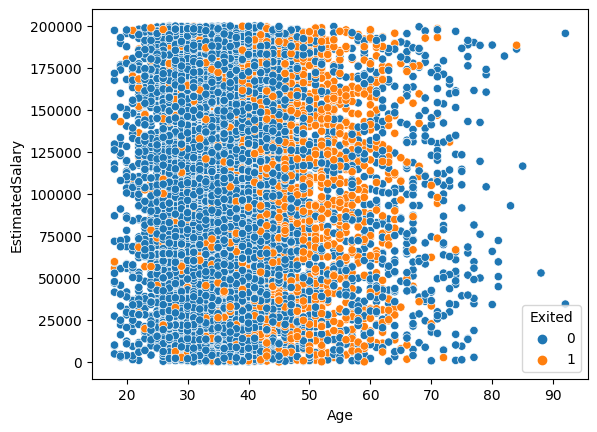

In [14]:
sns.scatterplot(data=df, x=df.Age, y=df.EstimatedSalary, hue='Exited' )

<Axes: xlabel='CreditScore', ylabel='EstimatedSalary'>

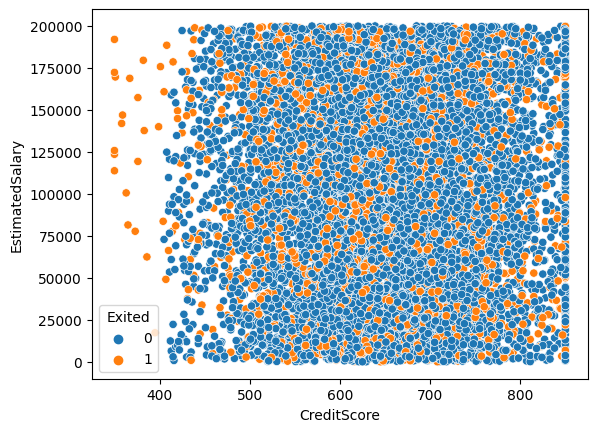

In [15]:
sns.scatterplot(data=df, x=df.CreditScore, y=df.EstimatedSalary, hue='Exited' )

<Axes: xlabel='Balance', ylabel='EstimatedSalary'>

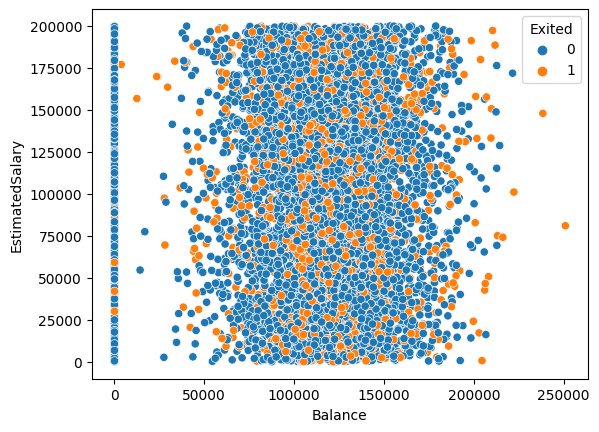

In [16]:
sns.scatterplot(data=df, x=df.Balance, y=df.EstimatedSalary, hue='Exited' )

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [19]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((8000, 8), (2000, 8), (8000,), (2000,))

In [20]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()

In [21]:
x_train = st.fit_transform(x_train)
x_test = st.transform(x_test)
x_train , x_test

(array([[-1.11833347, -0.90780431, -0.84839766, ..., -0.91047925,
          0.64434291,  1.00886381],
        [ 0.17644758, -0.90780431,  0.67279499, ...,  0.81106034,
         -1.55196866, -1.21900347],
        [ 1.20191418,  0.30038642, -0.37302496, ..., -0.91047925,
          0.64434291,  0.27717518],
        ...,
        [ 0.36289605, -0.90780431, -0.4680995 , ...,  0.81106034,
          0.64434291,  0.83669881],
        [-0.14465812, -0.90780431,  0.19742228, ...,  0.81106034,
         -1.55196866,  0.05058919],
        [-0.38289783,  0.30038642, -0.84839766, ...,  0.81106034,
          0.64434291, -0.77822196]]),
 array([[-0.77651127,  0.30038642, -0.27795042, ..., -0.91047925,
          0.64434291, -1.32459834],
        [ 1.3987209 ,  1.50857716,  0.10234774, ...,  0.81106034,
         -1.55196866, -1.01308395],
        [-0.92152675,  0.30038642, -0.75332312, ...,  0.81106034,
         -1.55196866,  0.75896826],
        ...,
        [ 1.75090134, -0.90780431,  0.0072732 , ..., -

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
score_dict = dict()
for k in range(3,11):
    knn_cl = KNeighborsClassifier(n_neighbors=k)
    knn_cl.fit(x_train, y_train)
    score = knn_cl.score(x_test,y_test)
    score_dict[k]=score
score_dict

{3: 0.819,
 4: 0.8355,
 5: 0.834,
 6: 0.8395,
 7: 0.843,
 8: 0.8455,
 9: 0.85,
 10: 0.8485}

### The most suitable k is 9

In [24]:
knn_cl = KNeighborsClassifier(n_neighbors=9)
knn_cl.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [25]:
y_pred_k = knn_cl.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix,classification_report,balanced_accuracy_score

In [27]:
print(classification_report(y_test,y_pred_k))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1604
           1       0.70      0.43      0.53       396

    accuracy                           0.85      2000
   macro avg       0.78      0.69      0.72      2000
weighted avg       0.84      0.85      0.84      2000



<Axes: >

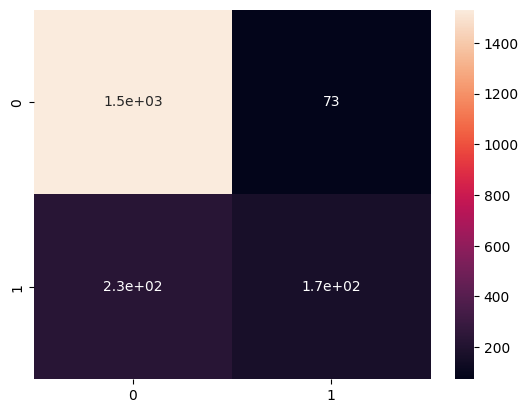

In [28]:
cm = confusion_matrix(y_test,y_pred_k)
sns.heatmap(cm, annot=True)

In [29]:
balanced_accuracy_score(y_test,y_pred_k)

0.6906282274112698

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logReg = LogisticRegression()

In [32]:
logReg.fit(x_train,y_train)

LogisticRegression()

In [33]:
y_pred_log = logReg.predict(x_test)

In [34]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1604
           1       0.32      0.06      0.10       396

    accuracy                           0.79      2000
   macro avg       0.56      0.51      0.49      2000
weighted avg       0.71      0.79      0.73      2000



<Axes: >

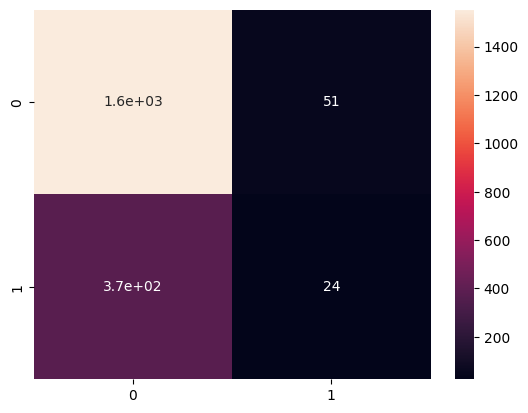

In [35]:
cm_log = confusion_matrix(y_test,y_pred_log)
sns.heatmap(cm_log, annot=True)

In [36]:
balanced_accuracy_score(y_test,y_pred_log)

0.5144052746920578

In [37]:
from sklearn.svm import SVC

In [38]:
svm = SVC()

In [39]:
svm.fit(x_train,y_train)

SVC()

In [40]:
y_pred_svm = svm.predict(x_test)

In [41]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1604
           1       0.74      0.36      0.49       396

    accuracy                           0.85      2000
   macro avg       0.80      0.67      0.70      2000
weighted avg       0.84      0.85      0.83      2000



<Axes: >

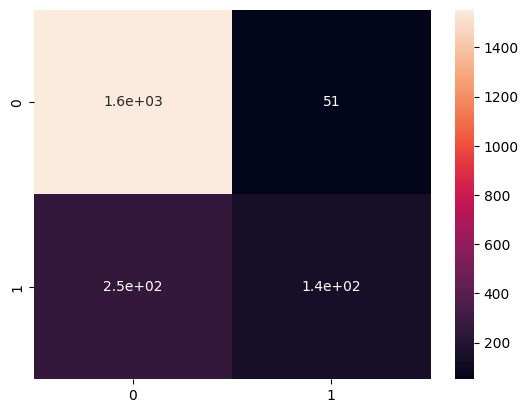

In [42]:
cm_svm = confusion_matrix(y_test,y_pred_svm)
sns.heatmap(cm_svm, annot=True)

In [43]:
balanced_accuracy_score(y_test,y_pred_svm)

0.6659204262072093

## Depends on modelling three classified algorithms, the scores of evaluations are low and inappropriate. 

## f1-score, recall, precision, balanced accuracy and FN are low.

## score of recall and number of FN are proven the problems of imbalanced dataset.

## Solving by Resampling, SMOTE, BalancedBaggingClassifier and ThresholdMoving

In [44]:
import imblearn

In [45]:
from imblearn.ensemble import BalancedBaggingClassifier

In [46]:
bbc = BalancedBaggingClassifier(estimator=KNeighborsClassifier(),
                               sampling_strategy='not majority',
                               replacement=False,
                               random_state=42)

In [47]:
bbc.fit(x_train,y_train)

BalancedBaggingClassifier(estimator=KNeighborsClassifier(), random_state=42,
                          sampling_strategy='not majority')

In [48]:
bbc_k_pred = bbc.predict(x_test)

In [49]:
balanced_accuracy_score(y_test,bbc_k_pred)

0.6875739943071614

In [50]:
print(classification_report(y_test,bbc_k_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1604
           1       0.64      0.44      0.52       396

    accuracy                           0.84      2000
   macro avg       0.75      0.69      0.71      2000
weighted avg       0.82      0.84      0.83      2000



In [51]:
bbc = BalancedBaggingClassifier(estimator=LogisticRegression(),
                               sampling_strategy='not majority',
                               replacement=False,
                               random_state=42)

In [52]:
bbc.fit(x_train,y_train)

BalancedBaggingClassifier(estimator=LogisticRegression(), random_state=42,
                          sampling_strategy='not majority')

In [53]:
bbc_log_pred=bbc.predict(x_test)

In [54]:
balanced_accuracy_score(y_test,bbc_log_pred)

0.5118800221668052

In [55]:
print(classification_report(y_test,bbc_log_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1604
           1       0.30      0.06      0.09       396

    accuracy                           0.79      2000
   macro avg       0.55      0.51      0.49      2000
weighted avg       0.71      0.79      0.72      2000



In [56]:
bbc = BalancedBaggingClassifier(estimator=SVC(),
                               sampling_strategy='not majority',
                               replacement=False,
                               random_state=42)

In [57]:
bbc.fit(x_train,y_train)

BalancedBaggingClassifier(estimator=SVC(), random_state=42,
                          sampling_strategy='not majority')

In [58]:
bbc_svm_pred=bbc.predict(x_test)

In [59]:
balanced_accuracy_score(y_test,bbc_svm_pred)

0.6627402453462304

In [60]:
print(classification_report(y_test,bbc_svm_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1604
           1       0.76      0.35      0.48       396

    accuracy                           0.85      2000
   macro avg       0.81      0.66      0.70      2000
weighted avg       0.84      0.85      0.83      2000



In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
bbc = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(),
                               sampling_strategy='not majority',
                               replacement=False,
                               random_state=42)

In [63]:
bbc.fit(x_train,y_train)

BalancedBaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42,
                          sampling_strategy='not majority')

In [64]:
bbc_dt_pred=bbc.predict(x_test)

In [65]:
balanced_accuracy_score(y_test,bbc_dt_pred)

0.6919853144915489

In [66]:
print(classification_report(y_test,bbc_dt_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1604
           1       0.64      0.44      0.53       396

    accuracy                           0.84      2000
   macro avg       0.76      0.69      0.72      2000
weighted avg       0.83      0.84      0.83      2000



### Depends on modelling with BlancedBaggingClassifier by four estimators, the scores of evaluation are unsuitable.

In [67]:
from sklearn.utils import resample

In [68]:
df_majority = df[df['Exited']==0]
df_minority = df[df['Exited']==1]

In [69]:
df_majority.count()

CreditScore        7963
Geography          7963
Gender             7963
Age                7963
Tenure             7963
Balance            7963
NumOfProducts      7963
HasCrCard          7963
IsActiveMember     7963
EstimatedSalary    7963
Exited             7963
dtype: int64

In [70]:
df_minority.count()

CreditScore        2037
Geography          2037
Gender             2037
Age                2037
Tenure             2037
Balance            2037
NumOfProducts      2037
HasCrCard          2037
IsActiveMember     2037
EstimatedSalary    2037
Exited             2037
dtype: int64

In [71]:
df_minority_upsampled = resample(df_minority,
                                replace=True,
                                n_samples=7963,
                                random_state=42)

In [72]:
df_upsampled = pd.concat([df_minority_upsampled,df_majority])

In [73]:
df.shape

(10000, 11)

In [74]:
df_upsampled['Exited'].value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [75]:
df_upsampled.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5363,771,2,1,51,5,135506.58,3,1,1,152479.64,1
7088,556,0,0,54,4,150005.38,1,1,0,157015.50,1
4076,672,0,0,50,1,0.00,1,1,0,12106.82,1
6255,547,1,1,55,4,111362.76,3,1,0,16922.28,1
5371,712,0,1,33,3,153819.58,1,1,0,79176.09,1


In [76]:
x = np.array(df_upsampled.iloc[:,:-1])

In [77]:
y = np.array(df_upsampled.iloc[:,-1])

In [78]:
x_up_train, x_up_test, y_up_train, y_up_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [79]:
x_up_train.shape , x_up_test.shape

((12740, 10), (3186, 10))

In [80]:
y_up_train.shape , y_up_test.shape

((12740,), (3186,))

In [81]:
x_up_train = st.fit_transform(x_up_train)
x_up_test = st.transform(x_up_test)

In [82]:
x_up_train , x_up_test

(array([[ 2.07346166, -0.96166149, -1.02447526, ...,  0.65489837,
          1.08285661,  1.55727047],
        [-0.77046905,  0.29105501,  0.97610947, ...,  0.65489837,
         -0.9234833 ,  1.66795567],
        [ 0.44689697, -0.96166149, -1.02447526, ...,  0.65489837,
          1.08285661,  1.6857659 ],
        ...,
        [-1.32288724,  0.29105501,  0.97610947, ..., -1.52695447,
         -0.9234833 , -0.14035077],
        [-0.09529126,  1.54377152,  0.97610947, ...,  0.65489837,
          1.08285661,  0.10202054],
        [-0.57609968, -0.96166149, -1.02447526, ...,  0.65489837,
          1.08285661,  1.66259271]]),
 array([[-0.67839935,  0.29105501, -1.02447526, ...,  0.65489837,
          1.08285661,  1.45842816],
        [-1.60932631, -0.96166149,  0.97610947, ...,  0.65489837,
         -0.9234833 ,  1.22399147],
        [ 0.37528721, -0.96166149,  0.97610947, ...,  0.65489837,
         -0.9234833 ,  0.33915238],
        ...,
        [ 0.6514963 , -0.96166149, -1.02447526, ...,  

In [83]:
y_up_train , y_up_test

(array([0, 1, 0, ..., 1, 0, 1], dtype=int64),
 array([1, 1, 1, ..., 1, 1, 0], dtype=int64))

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

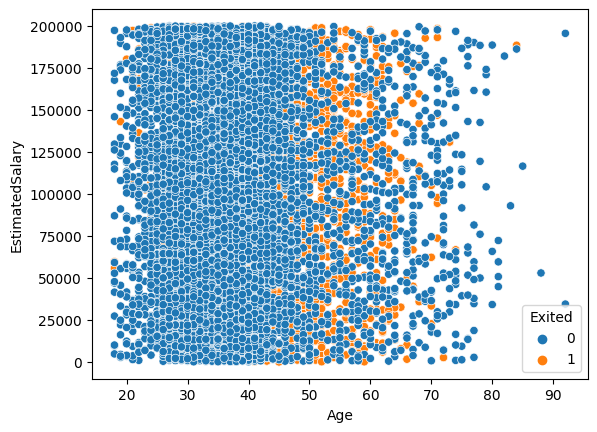

In [84]:
sns.scatterplot(data=df_upsampled, x=df_upsampled.Age, y=df_upsampled.EstimatedSalary, hue=df_upsampled.Exited )

In [85]:
knn_up = KNeighborsClassifier(n_neighbors=9)

In [86]:
knn_up.fit(x_up_train,y_up_train)

KNeighborsClassifier(n_neighbors=9)

In [87]:
knn_up_pred = knn_up.predict(x_up_test)

In [88]:
print(classification_report(y_up_test,knn_up_pred))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1581
           1       0.78      0.85      0.81      1605

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186



<Axes: >

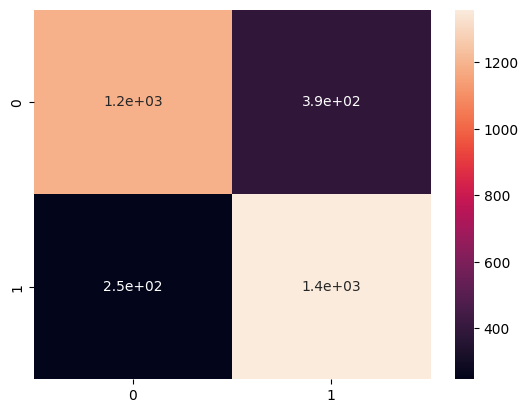

In [89]:
sns.heatmap(confusion_matrix(y_up_test,knn_up_pred),annot=True)

In [90]:
dt_up = DecisionTreeClassifier()

In [91]:
dt_up.fit(x_up_train,y_up_train)

DecisionTreeClassifier()

In [92]:
dt_up_pred = dt_up.predict(x_up_test)

In [93]:
print(classification_report(y_up_test,dt_up_pred))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1581
           1       0.88      0.97      0.92      1605

    accuracy                           0.92      3186
   macro avg       0.92      0.92      0.92      3186
weighted avg       0.92      0.92      0.92      3186



<Axes: >

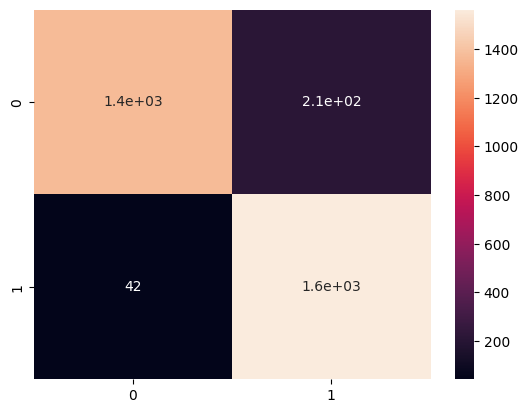

In [94]:
sns.heatmap(confusion_matrix(y_up_test,dt_up_pred),annot=True)

In [95]:
svm_up = SVC()

In [96]:
svm_up.fit(x_up_train,y_up_train)

SVC()

In [97]:
svm_up_pred = svm_up.predict(x_up_test)

In [98]:
print(classification_report(y_up_test,svm_up_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1581
           1       0.81      0.81      0.81      1605

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186



<Axes: >

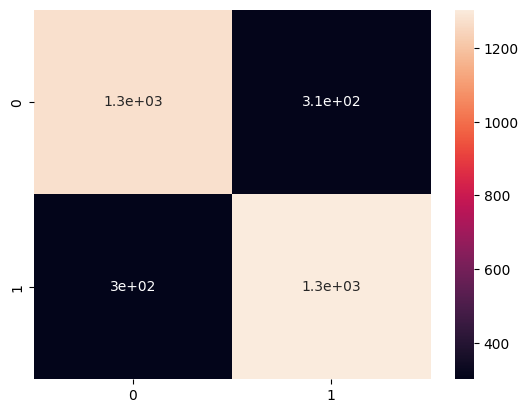

In [99]:
sns.heatmap(confusion_matrix(y_up_test,svm_up_pred),annot=True)

## Resample method is appropriate for modelling this imbalanced dataset

## In comparing between the algorithms, Decision Tree is the most suitable because FN is low, recall is high.